# Business Problem

As a marketing agency, our primary objective is to maximize the return on investments (ROI) for our clients' adverdising campaigns. We have condeucted two AD campaigns, one on Facebook and the other on AdWords, and we need to determin which platform yeilds better result in terms of clicks, conversions and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question

Which AD platform is more effective in terms of conversions, clicks and overall cost-effectiveness?

### Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


### Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:

Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.

Ad Views: The number of times the ad was viewed.

Ad Clicks: The number of clicks received on the ad

Ad Conversions: The number of conversions resulting from the ad

Cost per Ad: The cost associated with running the Facebook ad campaign.

Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.

Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.

Cost per Click (CPC): The average cost incurred per click on the ad ($).


In [40]:
df = pd.read_csv('marketing_campaign - sheet1.csv')
df.head()

,Date,FB_Views,FB_Clicks,FB_Conversions,FB_Cost,FB_CTR,FB_Conversion_Rate,FB_CPC,AW_Views,AW_Clicks,AW_Conversions,AW_Cost,AW_CTR,AW_Conversion_Rate,AW_CPC
0,2019-01-01,4835,116,14,52.00,2.40,12.24,0.45,3525,128,16,85.98,3.65,12.60,0.67
1,2019-01-02,4424,113,12,51.09,2.56,10.83,0.45,2950,92,14,51.93,3.12,15.69,0.56
2,2019-01-03,4977,124,15,50.46,2.50,12.49,0.41,3515,140,25,91.28,3.99,18.04,0.65
3,2019-01-04,5595,141,14,66.48,2.52,9.96,0.47,3179,110,14,72.78,3.47,12.96,0.66
4,2019-01-05,4412,101,13,46.60,2.31,13.23,0.46,3340,117,17,79.65,3.51,15.28,0.68


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                365 non-null    object 
 1   FB_Views            365 non-null    int64  
 2   FB_Clicks           365 non-null    int64  
 3   FB_Conversions      365 non-null    int64  
 4   FB_Cost             365 non-null    float64
 5   FB_CTR              365 non-null    float64
 6   FB_Conversion_Rate  365 non-null    float64
 7   FB_CPC              365 non-null    float64
 8   AW_Views            365 non-null    int64  
 9   AW_Clicks           365 non-null    int64  
 10  AW_Conversions      365 non-null    int64  
 11  AW_Cost             365 non-null    float64
 12  AW_CTR              365 non-null    float64
 13  AW_Conversion_Rate  365 non-null    float64
 14  AW_CPC              365 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 42.9+ KB

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                365 non-null    datetime64[ns]
 1   FB_Views            365 non-null    int64         
 2   FB_Clicks           365 non-null    int64         
 3   FB_Conversions      365 non-null    int64         
 4   FB_Cost             365 non-null    float64       
 5   FB_CTR              365 non-null    float64       
 6   FB_Conversion_Rate  365 non-null    float64       
 7   FB_CPC              365 non-null    float64       
 8   AW_Views            365 non-null    int64         
 9   AW_Clicks           365 non-null    int64         
 10  AW_Conversions      365 non-null    int64         
 11  AW_Cost             365 non-null    float64       
 12  AW_CTR              365 non-null    float64       
 13  AW_Conversion_Rate  365 non-null    float64       

In [43]:
df.shape

(365, 15)

In [44]:
df.describe()

,Date,FB_Views,FB_Clicks,FB_Conversions,FB_Cost,FB_CTR,FB_Conversion_Rate,FB_CPC,AW_Views,AW_Clicks,AW_Conversions,AW_Cost,AW_CTR,AW_Conversion_Rate,AW_CPC
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,4973.597260,123.191781,14.580822,55.920384,2.490411,12.152301,0.451863,3990.501370,139.263014,20.589041,90.970795,3.498521,15.042986,0.650411
min,2019-01-01 00:00:00,2155.000000,53.000000,6.000000,24.410000,1.830000,8.580000,0.380000,2036.000000,65.000000,9.000000,41.000000,2.440000,11.090000,0.560000
25%,2019-04-02 00:00:00,4372.000000,106.000000,12.000000,47.520000,2.310000,11.360000,0.440000,3511.000000,120.000000,17.000000,77.530000,3.290000,13.990000,0.630000
50%,2019-07-02 00:00:00,4948.000000,122.000000,14.000000,55.120000,2.490000,12.200000,0.450000,3934.000000,135.000000,20.000000,89.210000,3.490000,15.040000,0.650000
75%,2019-10-01 00:00:00,5565.000000,139.000000,17.000000,63.270000,2.660000,12.850000,0.470000,4454.000000,158.000000,24.000000,102.080000,3.720000,16.030000,0.670000
max,2019-12-31 00:00:00,7811.000000,255.000000,31.000000,106.880000,3.270000,15.160000,0.510000,6351.000000,223.000000,34.000000,144.970000,4.600000,19.660000,0.780000
std,NaN,864.574318,24.450139,3.430978,11.527718,0.254936,1.148423,0.023213,705.159313,28.997099,4.957056,19.604123,0.341298,1.475897,0.032549


### Comparing Campaign performance

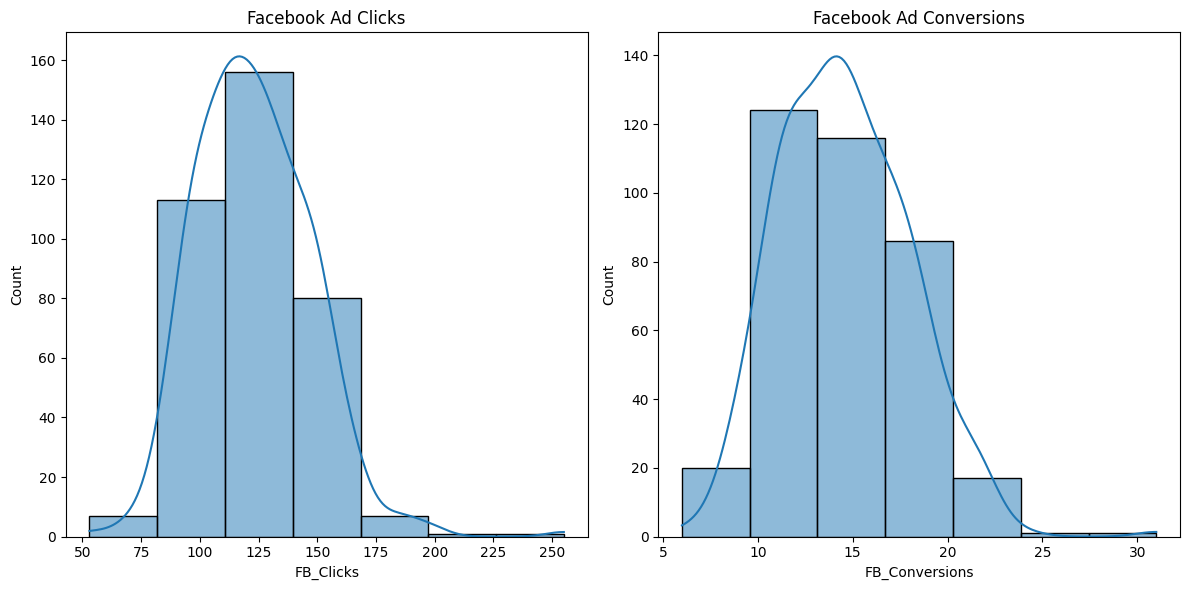

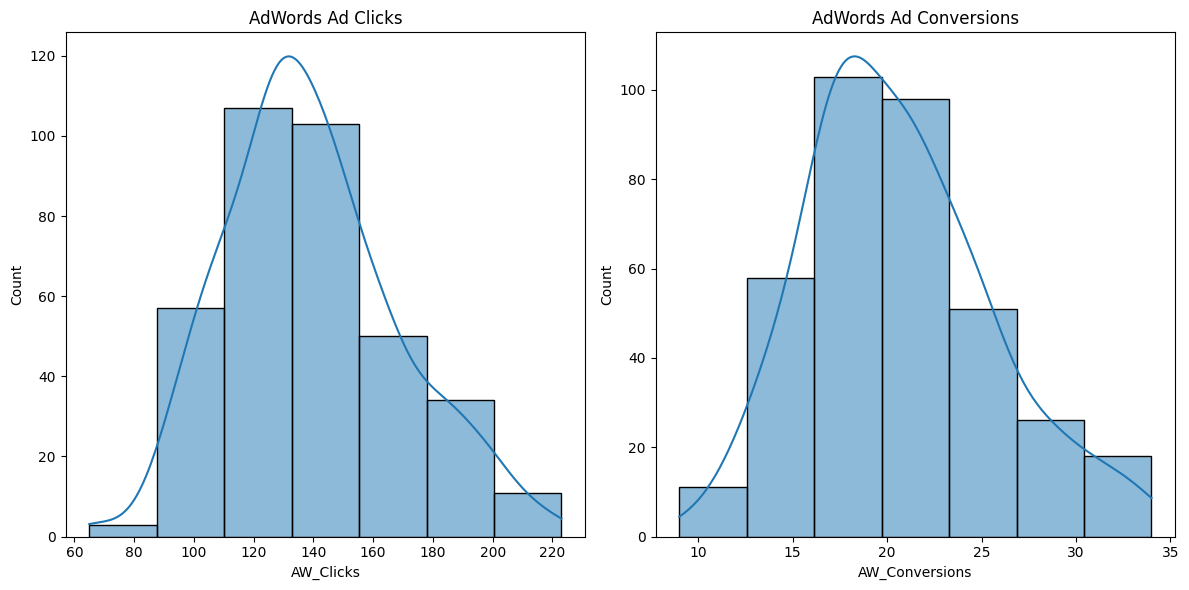

In [45]:
# Distribution of clicks and conversion
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['FB_Clicks'], bins=7, kde=True)
plt.subplot(1, 2, 2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['FB_Conversions'], bins=7, kde=True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AW_Clicks'], bins=7, kde=True)
plt.subplot(1, 2, 2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AW_Conversions'], bins=7, kde=True)
plt.tight_layout()
plt.show()


It is observed in the above graph that :-

Facebook Ad clicks histogram is almost normally distributed with few outliers (200 - 250 clicks someday)<br>
Facebook Ad conversion histogram is almost normally distributed with few outliers (20 - 30 conversions)

AdWord Ad clicks histogram is normally distributed but it is slightly skewed towards left.<br>
AdWord Ad conversions histogram is normally distributed but it is slightly skwews towards left.

<b>How frequently do we observe days with high numbers of conversions to days with low number of conversions?</b>

In [46]:
# Creating function to calculate the category for the conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 10:
            category.append('Less than 10')
        elif conversion >= 10 and conversion < 15:
            category.append('10 to 15')
        elif conversion >= 15 and conversion < 20:
            category.append('15 to 20')
        else:
            category.append('More than 20')

    return category

# Applying functions to different campaigns
df['FB_Conversion_Category'] = create_conversion_category('FB_Conversions')
df['AW_Conversion_Category'] = create_conversion_category('AW_Conversions')



In [47]:
df[['FB_Conversions','FB_Conversion_Category', 'AW_Conversions', 'AW_Conversion_Category']].head(10)


,FB_Conversions,FB_Conversion_Category,AW_Conversions,AW_Conversion_Category
0,14,10 to 15,16,15 to 20
1,12,10 to 15,14,10 to 15
2,15,15 to 20,25,More than 20
3,14,10 to 15,14,10 to 15
4,13,10 to 15,17,15 to 20
5,13,10 to 15,20,More than 20
6,18,15 to 20,25,More than 20
7,19,15 to 20,22,More than 20
8,16,15 to 20,15,15 to 20
9,20,More than 20,20,More than 20


In [52]:
df['FB_Conversion_Category'].value_counts()


FB_Conversion_Category
10 to 15        170
15 to 20        147
More than 20     28
Less than 10     20
Name: count, dtype: int64

In [56]:
facebook = pd.DataFrame(df['FB_Conversion_Category'].value_counts()).reset_index().rename(columns = {'FB_Conversion_Category': 'Category'})
facebook

,Category,count
0,10 to 15,170
1,15 to 20,147
2,More than 20,28
3,Less than 10,20


In [54]:
df['AW_Conversion_Category'].value_counts()

AW_Conversion_Category
More than 20    193
15 to 20        137
10 to 15         33
Less than 10      2
Name: count, dtype: int64

In [57]:
adword = pd.DataFrame(df['AW_Conversion_Category'].value_counts()).reset_index().rename(columns = {'AW_Conversion_Category': 'Category'})
adword

,Category,count
0,More than 20,193
1,15 to 20,137
2,10 to 15,33
3,Less than 10,2


In [62]:
category_df = pd.merge(facebook, adword, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 to 15,170,33
1,15 to 20,147,137
2,Less than 10,20,2
3,More than 20,28,193


In [63]:
category_df = category_df.iloc[[2, 0, 1, 3]]
category_df.reset_index(inplace = True, drop = True)
category_df


,Category,count_x,count_y
0,Less than 10,20,2
1,10 to 15,170,33
2,15 to 20,147,137
3,More than 20,28,193


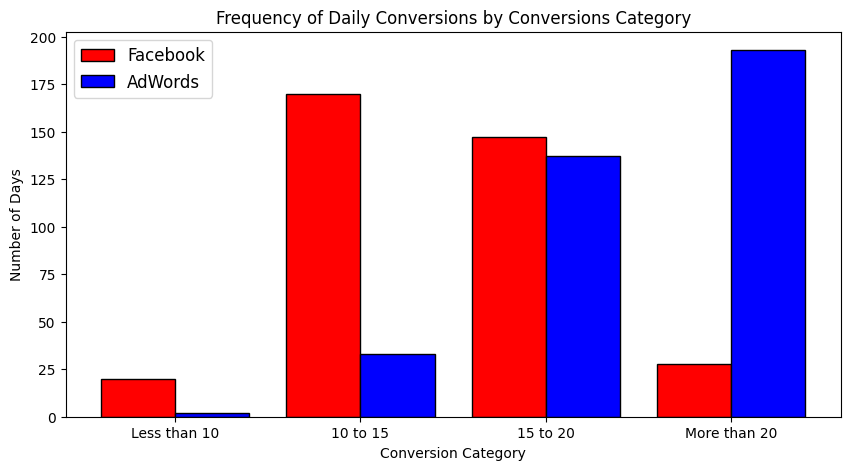

In [65]:
x_axis = np.arange(len(category_df))
plt.figure(figsize = (10, 5))
plt.bar(x_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = 'red', linewidth = 1, edgecolor = 'k')
plt.bar(x_axis + 0.2, category_df['count_y'], 0.4, label = 'AdWords', color = 'blue', linewidth = 1, edgecolor = 'k')

plt.xticks(x_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of Days')
plt.title('Frequency of Daily Conversions by Conversions Category')
plt.legend(fontsize = 12)
plt.show()


It is observed that the marketing campaign of AdWords had around 45 days <br>
where the conversion was less than 10 or between 10 - 15.<br>
On the positive side, there more than 175 days where the conversion was more than 20.

For marketing campaign of Facebook, less than 25 days had conversions less than 10.<br>
Most of the times the conversions were between 10 - 15 and 15 - 20.<br>
But only around 25 days had conversions more than 20.

About Facebook campaign, we can see very less number of connversions that are more than 20. This indicates a need to review what startegies were changed or what external factors could have influenced these numbers.

<b>Do more clicks on the Ad really lead to more sales</b>

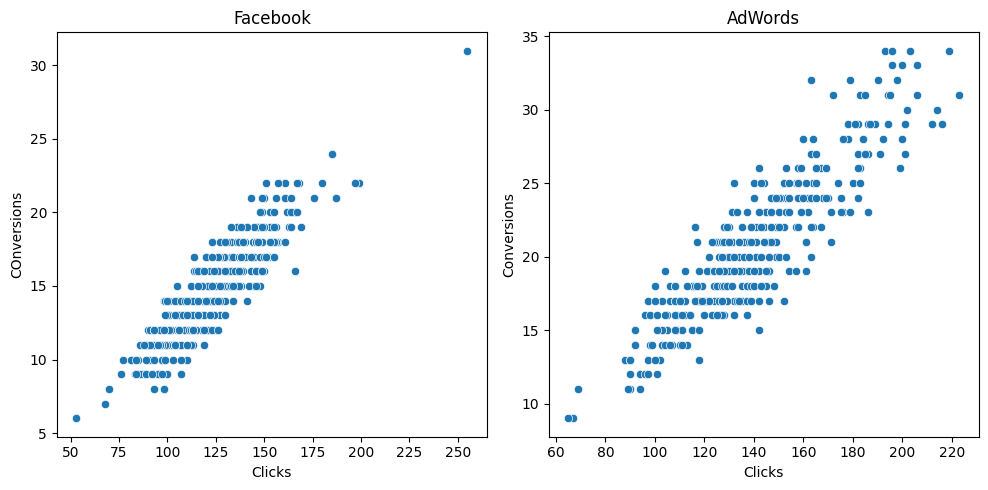

In [66]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title('Facebook')
sns.scatterplot(x = df['FB_Clicks'], y = df['FB_Conversions'])
plt.xlabel('Clicks')
plt.ylabel('COnversions')
plt.subplot(1, 2, 2)
plt.title('AdWords')
sns.scatterplot(x = df['AW_Clicks'], y = df['AW_Conversions'])
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.tight_layout()
plt.show()




In [70]:
facebook_corr = df[['FB_Conversions', 'FB_Clicks']].corr()
adword_corr = df[['AW_Conversions', 'AW_Clicks']].corr()

print('Correlation Coeff \n--------------------------')
print('Facebook :', round(facebook_corr.values[0, 1], 2))
print('AdWords :', round(adword_corr.values[0, 1], 2))

Correlation Coeff 
--------------------------
Facebook : 0.91
AdWords : 0.9


A correlation coefficient of 0.91 indicates a strong positive correlation between the number of clicks and conversions for Facebook.<br>
This suggests that as the number of clicks increases, the number of Sales also tends to increase.

A correlation coefficient of 0.9 indicates a strong positive correlation between the number of clicks and conversions for AdWords.<br>
This suggests that as the number of clicks increases, the number of Sales also tends to increase.

Such strong correlation between clicks on both platforms and sales suggests that both the campaigns are highly effective in <br>
driving sales for the business. Increasing investment in Facebook Ads or optimizing their performance could potentially lead <br>
to even higher sales. 

## A/B Testing (Hypothesis Testing)

<b>Hypothesis:</b> Both the campaigns are performing good equally.

<b>Null Hypothesis (H0):</b> The mean number of conversions is the same for both platforms (Facebook and AdWord both performaing equally good).</br>

<b>Alternate Hypothesis (Ha):</b> The mean number of conversions is different for the two platforms (Either one of the platform is better than the other).</br>

Facebook and AdWords are separate platforms with potentially different audience behavior, budgets, and algorithms, they should be treated as independent samples. Therefore, the correct test to use is the independent two-sample t-test.

In [75]:
# Checking normality for both the groups
shapiro_fb = st.shapiro(df['FB_Conversions'])
shapiro_aw = st.shapiro(df['AW_Conversions'])

print(f'Shapiro-Wilk test p-value for Facebook: {shapiro_fb.pvalue}')
print(f'Shapiro-Wilk test p-value for AdWords: {shapiro_aw.pvalue}')


Shapiro-Wilk test p-value for Facebook: 6.947629927400087e-06
Shapiro-Wilk test p-value for AdWords: 1.0189022388338188e-05


In [77]:
# Checking qeality of variances using levene's test
levene_test = st.levene(df['FB_Conversions'], df['AW_Conversions'])
print(f'Levene test p-value: {levene_test.pvalue}')


Levene test p-value: 2.6753432473247004e-09


Since: <br>
Normality is violated (Shapiro-Wilk test p-value < 0.05 for both groups).<br>
Variances are unequal (Levene’s test p-value < 0.05).

<b>We will be using Mann-Whitney U test</b>

In [79]:
# Perform Mann-Whitney U test
manwitney_test = st.mannwhitneyu(df['FB_Conversions'], df['AW_Conversions'], alternative = 'two-sided')
print(f'Mann-Whitney U test statistics: \np-value: {manwitney_test.pvalue}')

Mann-Whitney U test statistics: 
p-value: 1.6306015197374284e-58


pvalue is less than 0.05. 

We reject the null hypothesis: There is a significant difference in conversions between Facebook and AdWords.

<b>Which platform is better than the other?</b>

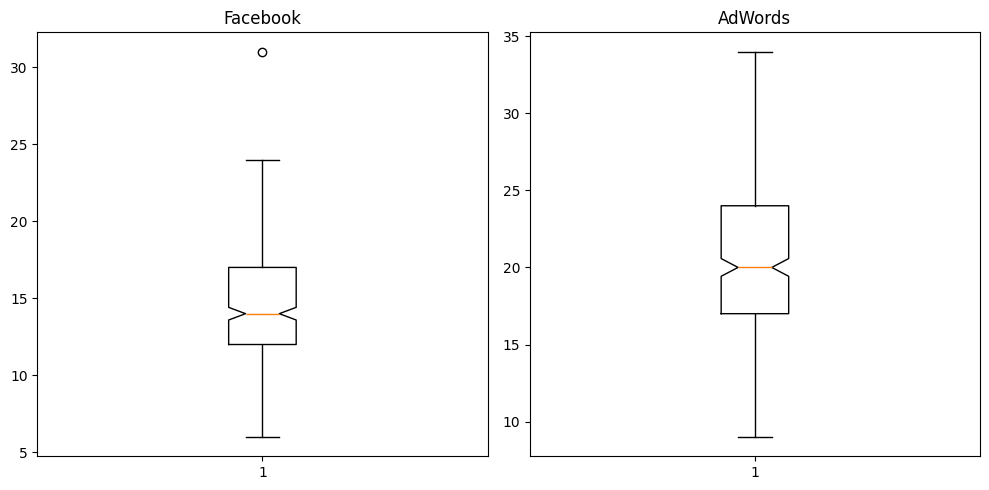

In [81]:
# Plotting boxplots for both the platforms for comparing medians
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title('Facebook')
plt.boxplot(df['FB_Conversions'], notch = True)
plt.subplot(1, 2, 2)
plt.title('AdWords')
plt.boxplot(df['AW_Conversions'], notch = True)
plt.tight_layout()
plt.show()

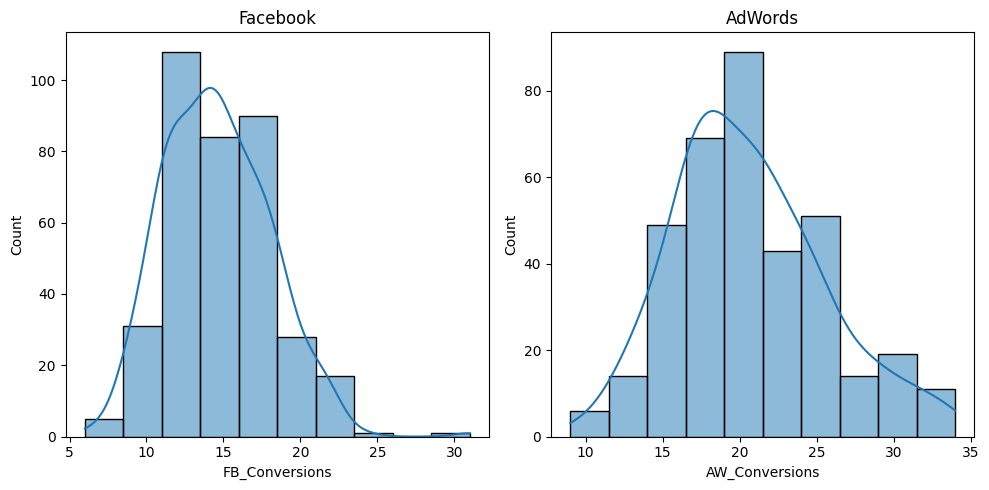

In [83]:
# Plotting histogram for both the platforms for comparing distribution
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.title('Facebook')
sns.histplot(df['FB_Conversions'], bins = 10, kde = True)
plt.subplot(1, 2, 2)
plt.title('AdWords')
sns.histplot(df['AW_Conversions'], bins = 10, kde = True)
plt.tight_layout()
plt.show()



To understand which platform is performing better than the other on ther are two ways :-
1. <b>Comparing the medians of both the platforms - </b><br>
From the boxplot we can see that the median of adwords is higher than that of facebook.<br>
Higher median indicates that AdWords is performing better than Facebook in terms of conversions.


2. <b>Comparing the distribution of both the platforms - </b><br>
From the histogram we can see that the distribution of AdWords has more higher values than Facebook.<br>
More higher values indicates that AdWords is performing better than Facebook in terms of conversions.

<b>Conclusion:</b><br>
AdWords is performing better than Facebook in terms of conversions.





# Conclusion

Adword platform is performing better than Facebook in terms of conversions.<br>
Although, the correlation between clicks on Facebook platform and conversions on Facebook platform was high.<br>
So, for increasing sales in the next year I would suggest that we should spilt our resources in 70:30 ratio.<br>
70% for Adword and 30% for Facebook.

<b></b>